<a href="https://colab.research.google.com/github/Felix-Think/SVD-and-It-s-Application/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
def compute_svd(matrix):
    # Tính svd sử dụng thư viện numpy
    U, S, V_T = np.linalg.svd(matrix)
    return U, S, V_T

#Question 1: Kết quả của đoạn code sau là gì
matrix = np.array([[7, 1], [0, 0],[5, 5]])

U, S, V_T = compute_svd(matrix)

S = np.diag(S)

print(np.matrix.round(S, 2))

print(U)



In [6]:
#Question 1
matrix = np.array([[7, 1], [0, 0],[5, 5]])
U, S, V_T = compute_svd(matrix)
#chuyển vector S thành ma trận dơn vị chứa các eigenvector ở đường chéo chính
S = np.diag(S)
print(np.matrix.round(S, 2))
print(U)

[[9.49 0.  ]
 [0.   3.16]]
[[-0.70710678  0.70710678  0.        ]
 [ 0.          0.         -1.        ]
 [-0.70710678 -0.70710678  0.        ]]


In [7]:
#Chuyển ảnh sang ảnh xám
def convertColorToGrayScale(image, ratio):
    image_gray = image @ ratio
    return np.around(image_gray).astype(np.uint8)


#Question 2: Kết quả của đoạn code sau đây là gì
color_image = cv2.imread('/content/cat.jpeg')

color_image = cv2.resize(color_image, (300, 300))

ratio_gray_scale = [0.2156, 0.7152, 0.0722]

gray_image = convertColorToGrayScale(color_image, ratio_gray_scale)

print(np.sum(gray_image))

In [16]:
 #Quenstion 2
color_image = cv2.imread('/content/cat.jpeg')
color_image = cv2.resize(color_image, (300, 300))
ratio_gray_scale = [0.2156, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_gray_scale)
print(np.sum(gray_image))

16538311


In [17]:
def computeDotProduct(vector1, vector2):
    return vector1.dot(vector2)

In [20]:
#Tìm cosine Similarity từ 2 vector
def computeCosineSimilarity(vector1, vector2):
    cos_sim =  computeDotProduct(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    return cos_sim

In [21]:
#Tìm cosine Similarity từ 2 ma trận
def computeCosinSimilarity(matrix1, matrix2):
    v1 = np.ndarray.flatten(matrix1) # chuyển ma trận 2 chiều thành một ma trận 1 chiều
    v2 = np.ndarray.flatten(matrix2)
    return computeCosineSimilarity(v1, v2)

In [22]:
def computeVectorLength(Vector):
    len_of_vector = np.linalg.norm(Vector)
    return len_of_vector

#Question 3: Kết quả của đoạn code sau đây là gì
A = np.array([[1, 2, 2],
              [3, 2, 2],
              [-2, 1, -3]])

B = np.array([[4, 2, 4],
              [2, -2, 5],
              [3, 4, -4]])

result = computeCosinSimilarity(A, B)

print(round(result, 2))

In [24]:
#Question 3
A = np.array([[1, 2, 2],
              [3, 2, 2],
              [-2, 1, -3]])
B = np.array([[4, 2, 4],
              [2, -2, 5],
              [3, 4, -4]])
result = computeCosinSimilarity(A, B)
print(round(result, 2))

0.57


#Project 1: Ứng dụng của SVD vào bài toán Image compression
Cho trước ảnh đầu vào là ảnh màu. Hãy phát triền chương trình ứng dụng SVD đê compress ảnh đâu vào sử dụng các giá trị k khác nhau trên ảnh grayscale. Lưu ý rằng k chính là rank của ma trận ảnh đầu vào sau khi được xám hóa(Hay chính xác hơn là tổng số các phần tử  khác không trong ma trạn, sau khi tính SVD). Bên cạnh đó, bạn cũng cần đánh giá độ sai lệch của ảnh reconstruction ứng dụng với tưng k so với ảnh gốc sử dụng 2 metrics là cosine và root mean square error.

-Hình 2 thể hiện ảnh reconstruction sử dụng các giá trị k khác nhau.

-HÌnh 3 thể hiện kết quả cosine similarity của ảnh reconstruction và ảnh gốc với các giá trị k khác nhau.

-Hình 4 thể hiện kết quả rms error của ảnh reconstruction và ảnh gốc với các giá trị k khác nhau.

In [27]:
def compute_rms_error(matrix1, matrix2):
    return np.sqrt(np.sum(np.square(matrix1 - matrix2)) / (matrix1.shape[0] * matrix1.shape[1]))


In [28]:
#Question4
A = np.array([[1, 2, 2],
              [3, 2, 2],
              [-2, 1, -3]])
B = np.array([[4, 2, 4],
              [2, -2, 5],
              [3, 4, -4]])
result = compute_rms_error(A, B)
print(round(result, 2))

2.87


In [50]:
def evaluate_svd_for_feature_compression_by_metric(gray_image, metric): #metric = 0 -> cos_similarity, metric = 1 -> RMS
    U, S, V_T = compute_svd(gray_image)
    k = len(S)
    S = np.diag(S) #Convert s into a indentify matrix
    approx_list = []
    metric_list = []
    for i in range(1, k + 1, 1):
        approx = U[:, :i] @ S[0:i, :i] @ V_T[:i, :]  # U(m x k) S(k x k) V_T(k x n)
        approx_list.append(approx)
        if metric == 0:
            metric_list.append(computeCosinSimilarity(gray_image, approx))
        else:
            metric_list.append(compute_rms_error(gray_image, approx))
    return approx_list, metric_list, k



In [55]:
def draw_metric_information(metric_list, k):
    # Creating x_axis using list() constructor and range() to ensure correct length
    x_axis = list(range(1, k + 1, 1))
    plt.xlabel('k')
    plt.ylabel('RMS error')
    plt.plot(x_axis, metric_list, color = 'red')
    plt.show()

In [56]:
def draw_approx_image(approx_list, k):
    row = 6
    column = 4
    fig = plt.figure(figsize = (25, 25))
    fig_index = 1
    for i in range(0, k, 13):
        #Addds a subplot at a 1st position
        fig.add_subplot(row, column, fig_index)
        plt.imshow(approx_list[i], cmap = 'gray')
        plt.axis('off')
        plt.title('k = ' + str(i + 1))
        fig_index += 1

In [57]:
def main_application():
    color_image = cv2.imread('/content/cat.jpeg')
    color_image = cv2.resize(color_image, (200, 200))
    ratio_gray_scale = [0.2156, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_gray_scale)
    approx_list, metric_list, k = evaluate_svd_for_feature_compression_by_metric(gray_image, 1)
    print(len(approx_list))
    draw_metric_information(metric_list, k)
    draw_approx_image(approx_list, k)

200


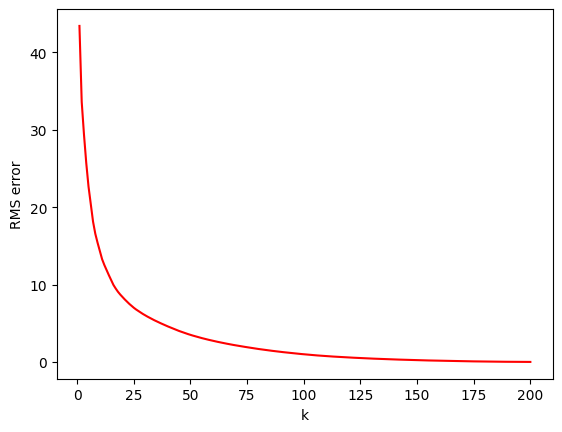

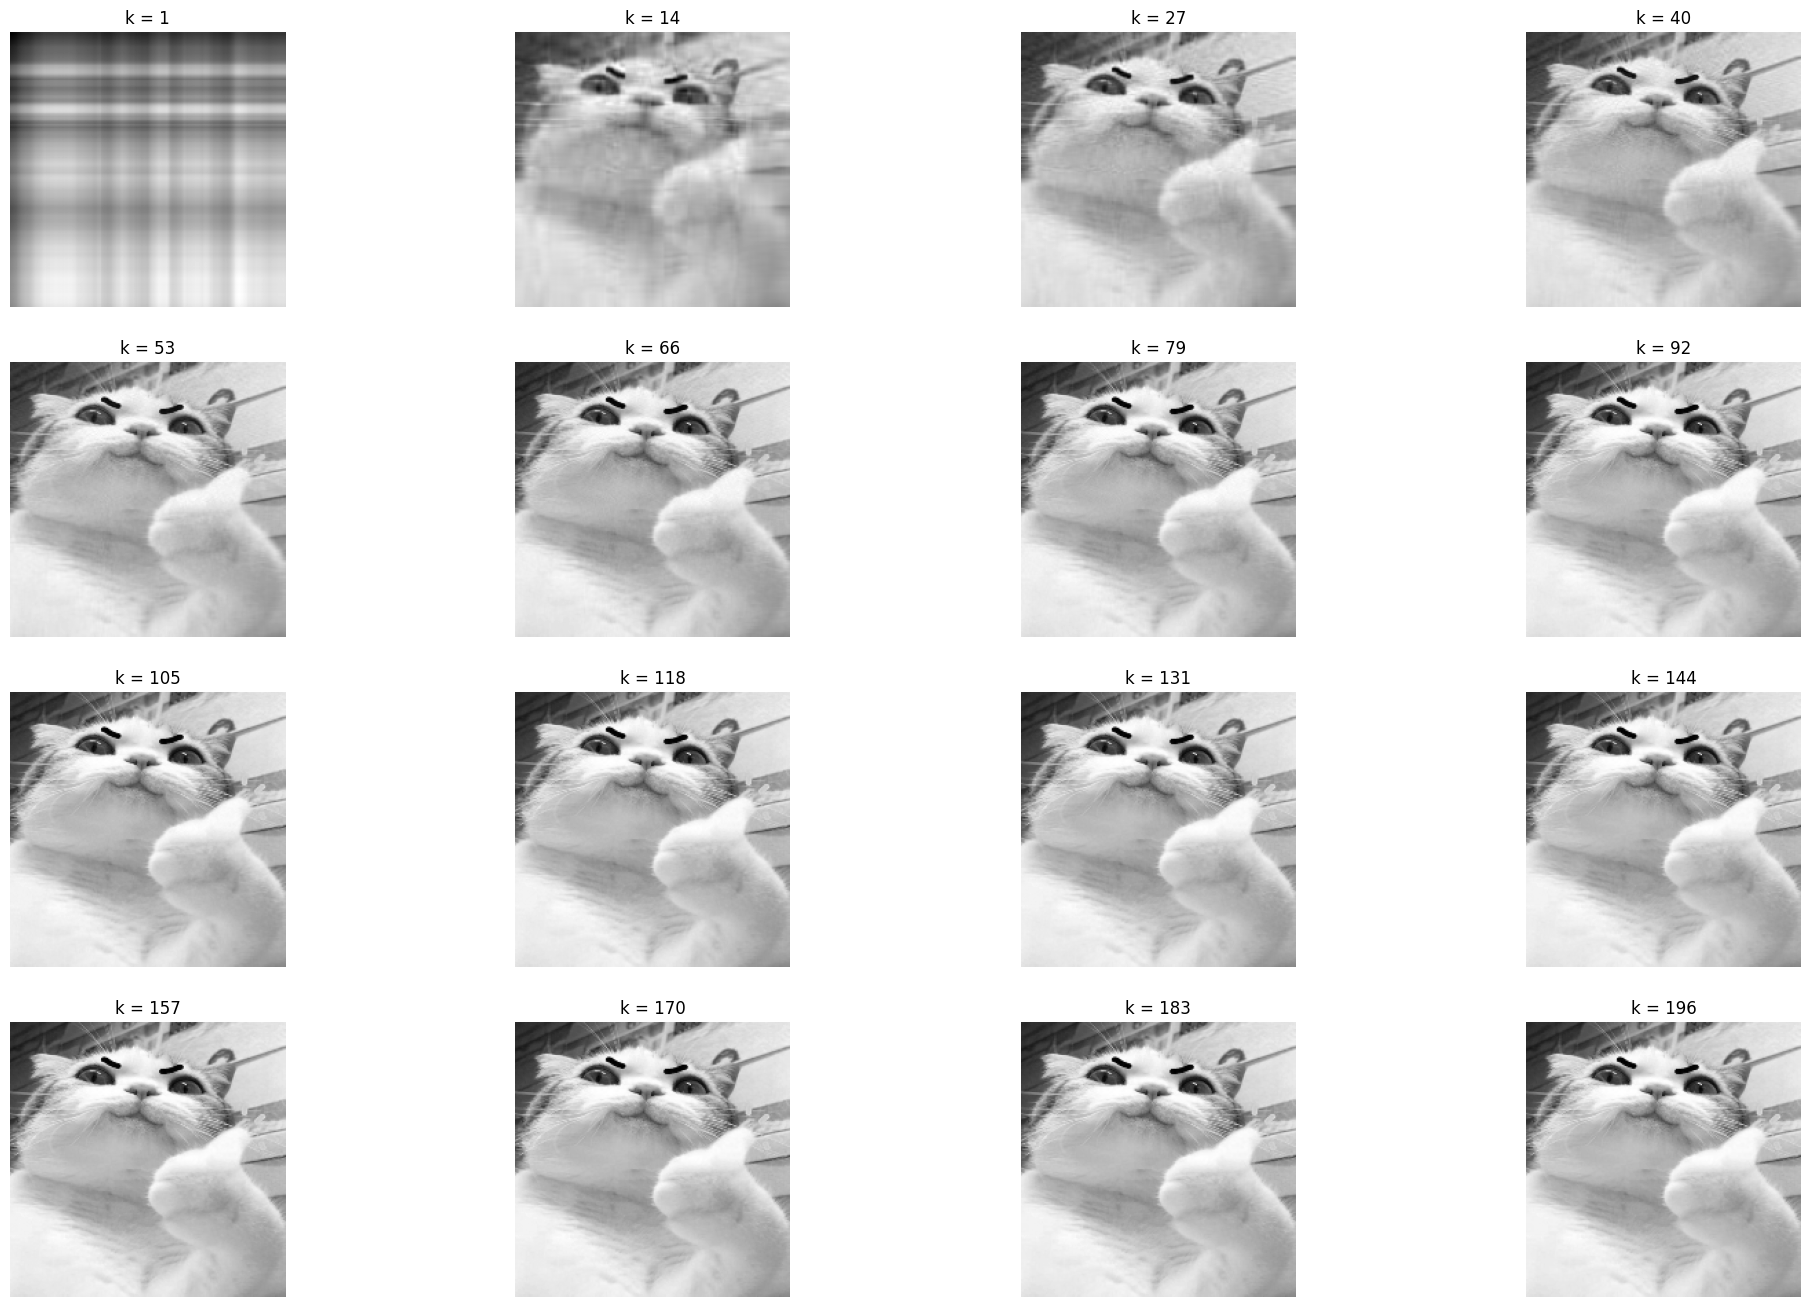

In [58]:
main_application()